In [1]:
from util import *

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mob1 = '../data/01-01-2023/DATA_LABEL'

In [4]:
mob1 = pd.read_parquet(mob1)
mob1

,AREA,PROFESSION,GEN_GRP,LIFE_STG,AGE,LOR,CREDIT_SCORE,CASA_HOLD,CASA_BAL_SUM_NOW,CASA_BAL_SUM_36M,...,CASA_BAL_SUM_12M,CASA_BAL_MAX_12M,CASA_TXN_AMT_SUM_12M,CASA_TXN_AMT_SUM_24M,CASA_TXN_AMT_SUM_36M,CASA_TXN_CT_12M,CASA_ACCT_CT_36M,CASA_ACCT_ACTIVE_CT_12M,CASA_DAY_SINCE_LAST_TXN_CT_36M,REACTIVATED_CASA
CUSTOMER_CDE,,,,,,,,,,,,,,,,,,,,,
4131389,VN0010006,"Kinh doanh tai san, dich vu tu van",Gen X,Thiết lập tài sản,44.0,3496.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1096.0,1
17174047,VN0010001,"HDong Dang, Doan The va Hiep Hoi",Gen Z,Bắt đầu sự nghiệp,19.0,128.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1096.0,0
17313854,VN0010001,"HDong Dang, Doan The va Hiep Hoi",Gen Z,Bắt đầu sự nghiệp,25.0,94.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1096.0,0
17084043,VN0010001,"HDong Dang, Doan The va Hiep Hoi",Gen Z,Bắt đầu sự nghiệp,22.0,149.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1096.0,0
17140611,VN0010001,"HDong Dang, Doan The va Hiep Hoi",Gen Z,Bắt đầu sự nghiệp,22.0,135.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1096.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17479714,VN0010007,"HDong Dang, Doan The va Hiep Hoi",Gen Z,Bắt đầu sự nghiệp,22.0,53.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1096.0,0
17519651,VN0010006,"Kinh doanh tai san, dich vu tu van",Gen X,Bảo vệ tài sản,48.0,40.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1096.0,0
16870958,VN0010006,"HDong Dang, Doan The va Hiep Hoi",Gen Z,Bắt đầu sự nghiệp,22.0,206.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1096.0,0


In [5]:
mob1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 911580 entries, 4131389 to 17634059
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   AREA                            911578 non-null  object 
 1   PROFESSION                      911577 non-null  object 
 2   GEN_GRP                         911577 non-null  object 
 3   LIFE_STG                        907906 non-null  object 
 4   AGE                             911577 non-null  float64
 5   LOR                             911577 non-null  float64
 6   CREDIT_SCORE                    10655 non-null   float64
 7   CASA_HOLD                       911088 non-null  float64
 8   CASA_BAL_SUM_NOW                415079 non-null  float64
 9   CASA_BAL_SUM_36M                420592 non-null  float64
 10  CASA_BAL_SUM_24M                420592 non-null  float64
 11  CASA_BAL_SUM_12M                415345 non-null  float64
 12  CASA_BAL_MAX_

In [6]:
mob1.columns

Index(['AREA', 'PROFESSION', 'GEN_GRP', 'LIFE_STG', 'AGE', 'LOR',
       'CREDIT_SCORE', 'CASA_HOLD', 'CASA_BAL_SUM_NOW', 'CASA_BAL_SUM_36M',
       'CASA_BAL_SUM_24M', 'CASA_BAL_SUM_12M', 'CASA_BAL_MAX_12M',
       'CASA_TXN_AMT_SUM_12M', 'CASA_TXN_AMT_SUM_24M', 'CASA_TXN_AMT_SUM_36M',
       'CASA_TXN_CT_12M', 'CASA_ACCT_CT_36M', 'CASA_ACCT_ACTIVE_CT_12M',
       'CASA_DAY_SINCE_LAST_TXN_CT_36M', 'REACTIVATED_CASA'],
      dtype='object')

In [7]:
for c in mob1.columns:
    if mob1[c].dtype == object:
        print(c, mob1[c].nunique())

AREA 8
PROFESSION 17
GEN_GRP 5
LIFE_STG 6


# IV and WoE

Guide line for IV:

- IV < 0.02: not useful for prediction-
- 0.02 - 0.1: weak relationship between indept and dependent
- 0.1 - 0.3: medium
- 0.3 - 0.5: strong
- IV > 0.5: suspicious predictive

In [8]:
def iv_woe(df, target, bins=10):
    def iv_power(x):
        if x < 0.02:
            return '0. no-use'
        elif x <= 0.1:
            return '1. weak'
        elif x <= 0.3:
            return '2. medium'
        elif x <= 0.5:
            return '3. strong'
        elif x > 0.5:
            return '4. suspicious'

    iv_df, woe_df = pd.DataFrame(), pd.DataFrame()
    cols = df.columns.tolist()
    cols.remove(target)
    for c in cols:
        if (df[c].dtype.kind in 'bifc') and (df[c].nunique() > 10):
            binned_x = pd.qcut(df[c], bins, duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': df[target]})
        else:
            d0 = pd.DataFrame({'x': df[c], 'y': df[target]})
        d = d0.groupby('x',as_index=False).agg({'y': ['count', 'sum']})
        d.columns = ['cutoff', 'n', 'num_event']
        d['perc_event'] = np.maximum(d['num_event'], 0.5) / d['num_event'].sum()
        d['num_non_event'] = d['n'] - d['num_event']
        d['perc_non_event'] = np.maximum(d['num_non_event'], 0.5) / d['num_non_event'].sum()
        d['woe'] = np.log(d['perc_non_event']/d['perc_event'])
        d['iv'] = d['woe'] * (d['perc_non_event'] - d['perc_event'])
        # print(f'{c}, {d["iv"].sum()}')
        d.insert(loc=0, column='variable', value=c)
        tmp = pd.DataFrame({'variable': [c], 'iv': [d['iv'].sum()]}, columns=['variable', 'iv'])
        iv_df = pd.concat([iv_df, tmp], axis=0)
        woe_df = pd.concat([woe_df, d], axis=0)
    iv_df['iv_power'] = iv_df['iv'].apply(lambda x: iv_power(x))
    return iv_df, woe_df

In [9]:
iv_df, woe_df = iv_woe(mob1, 'REACTIVATED_CASA')

In [10]:
iv_df.sort_values(by='iv')

,variable,iv,iv_power
0,CASA_DAY_SINCE_LAST_TXN_CT_36M,0.000000,0. no-use
0,CASA_HOLD,0.000000,0. no-use
0,CASA_BAL_SUM_NOW,0.006074,0. no-use
0,CASA_BAL_MAX_12M,0.009277,0. no-use
0,CASA_BAL_SUM_12M,0.010467,0. no-use
0,CASA_ACCT_CT_36M,0.036443,1. weak
0,LIFE_STG,0.081053,1. weak
0,GEN_GRP,0.097163,1. weak
0,AGE,0.130250,2. medium
0,CASA_ACCT_ACTIVE_CT_12M,0.149263,2. medium


In [11]:
woe_df

,variable,cutoff,n,num_event,perc_event,num_non_event,perc_non_event,woe,iv
0,AREA,VN0010001,153896,2683,0.203242,151213,0.168318,-0.188543,0.006585
1,AREA,VN0010002,70097,547,0.041436,69550,0.077417,0.625055,0.022490
2,AREA,VN0010003,77481,1835,0.139005,75646,0.084203,-0.501277,0.027471
3,AREA,VN0010004,60525,2153,0.163094,58372,0.064975,-0.920323,0.090301
4,AREA,VN0010005,128265,1417,0.107340,126848,0.141197,0.274150,0.009282
...,...,...,...,...,...,...,...,...,...
2,CASA_ACCT_CT_36M,3.0,4,2,0.006116,2,0.000046,-4.897360,0.029730
3,CASA_ACCT_CT_36M,4.0,2,0,0.001529,2,0.000046,-3.511066,0.005208
0,CASA_ACCT_ACTIVE_CT_12M,1.0,115,15,0.937500,100,1.000000,0.064539,0.004034
1,CASA_ACCT_ACTIVE_CT_12M,3.0,1,1,0.062500,0,0.005000,-2.525729,0.145229


In [12]:
woe_df[woe_df['variable']=='AREA']

,variable,cutoff,n,num_event,perc_event,num_non_event,perc_non_event,woe,iv
0,AREA,VN0010001,153896,2683,0.203242,151213,0.168318,-0.188543,0.006585
1,AREA,VN0010002,70097,547,0.041436,69550,0.077417,0.625055,0.022490
2,AREA,VN0010003,77481,1835,0.139005,75646,0.084203,-0.501277,0.027471
3,AREA,VN0010004,60525,2153,0.163094,58372,0.064975,-0.920323,0.090301
4,AREA,VN0010005,128265,1417,0.107340,126848,0.141197,0.274150,0.009282
5,AREA,VN0010006,167501,2412,0.182713,165089,0.183764,0.005731,0.000006
6,AREA,VN0010007,196924,1679,0.127187,195245,0.217331,0.535760,0.048295
7,AREA,VN0010008,56889,475,0.035982,56414,0.062795,0.556861,0.014931


In [13]:
woe_df[woe_df['variable']=='PROFESSION']

,variable,cutoff,n,num_event,perc_event,num_non_event,perc_non_event,woe,iv
0,PROFESSION,"Cong nghiep che bien, san xuat",39728,2046,0.154988,37682,0.041945,-1.307000,0.147748
1,PROFESSION,Cong nghiep khai thac,1330,1,0.000076,1329,0.001479,2.971886,0.004171
2,PROFESSION,"Giao duc, dao tao",31754,174,0.013181,31580,0.035152,0.980928,0.021552
3,PROFESSION,"HDong Dang, Doan The va Hiep Hoi",337614,6169,0.467313,331445,0.368938,-0.236371,0.023253
4,PROFESSION,"Khoa hoc, cong nghe",151,0,0.000038,151,0.000168,1.490131,0.000194
5,PROFESSION,"Kinh doanh tai san, dich vu tu van",192566,4265,0.323082,188301,0.209602,-0.432697,0.049102
6,PROFESSION,"Nong, lam nghiep",43736,196,0.014847,43540,0.048465,1.183025,0.039771
7,PROFESSION,"Qly nha nuoc, an ninh, quoc phong",3193,19,0.001439,3174,0.003533,0.898013,0.001880
8,PROFESSION,"Sx va pphoi dien, khi dot va nuoc",1302,0,0.000038,1302,0.001449,3.644508,0.005144
9,PROFESSION,"Tai chinh, tin dung",2925,13,0.000985,2912,0.003241,1.191350,0.002688


In [14]:
valid_cols = iv_df[iv_df['iv']>0.02]['variable'].tolist()
valid_cols

['AREA',
 'PROFESSION',
 'GEN_GRP',
 'LIFE_STG',
 'AGE',
 'LOR',
 'CREDIT_SCORE',
 'CASA_BAL_SUM_36M',
 'CASA_BAL_SUM_24M',
 'CASA_TXN_AMT_SUM_12M',
 'CASA_TXN_AMT_SUM_24M',
 'CASA_TXN_AMT_SUM_36M',
 'CASA_TXN_CT_12M',
 'CASA_ACCT_CT_36M',
 'CASA_ACCT_ACTIVE_CT_12M']

In [15]:
valid_mob1 = mob1[valid_cols]
valid_mob1

,AREA,PROFESSION,GEN_GRP,LIFE_STG,AGE,LOR,CREDIT_SCORE,CASA_BAL_SUM_36M,CASA_BAL_SUM_24M,CASA_TXN_AMT_SUM_12M,CASA_TXN_AMT_SUM_24M,CASA_TXN_AMT_SUM_36M,CASA_TXN_CT_12M,CASA_ACCT_CT_36M,CASA_ACCT_ACTIVE_CT_12M
CUSTOMER_CDE,,,,,,,,,,,,,,,
4131389,VN0010006,"Kinh doanh tai san, dich vu tu van",Gen X,Thiết lập tài sản,44.0,3496.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17174047,VN0010001,"HDong Dang, Doan The va Hiep Hoi",Gen Z,Bắt đầu sự nghiệp,19.0,128.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17313854,VN0010001,"HDong Dang, Doan The va Hiep Hoi",Gen Z,Bắt đầu sự nghiệp,25.0,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17084043,VN0010001,"HDong Dang, Doan The va Hiep Hoi",Gen Z,Bắt đầu sự nghiệp,22.0,149.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17140611,VN0010001,"HDong Dang, Doan The va Hiep Hoi",Gen Z,Bắt đầu sự nghiệp,22.0,135.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17479714,VN0010007,"HDong Dang, Doan The va Hiep Hoi",Gen Z,Bắt đầu sự nghiệp,22.0,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17519651,VN0010006,"Kinh doanh tai san, dich vu tu van",Gen X,Bảo vệ tài sản,48.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16870958,VN0010006,"HDong Dang, Doan The va Hiep Hoi",Gen Z,Bắt đầu sự nghiệp,22.0,206.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Get dummy variable for category cols
cat_dummy = [pd.get_dummies(mob1[c], prefix=c, prefix_sep=':') for c in valid_mob1.select_dtypes(object).columns]
cat_dummy = pd.concat(cat_dummy, axis=1)
cat_dummy

,AREA:VN0010001,AREA:VN0010002,AREA:VN0010003,AREA:VN0010004,AREA:VN0010005,AREA:VN0010006,AREA:VN0010007,AREA:VN0010008,"PROFESSION:Cong nghiep che bien, san xuat",PROFESSION:Cong nghiep khai thac,...,GEN_GRP:Gen X,GEN_GRP:Gen Y,GEN_GRP:Gen Z,GEN_GRP:Trước Gen X,LIFE_STG:Bảo vệ tài sản,LIFE_STG:Bắt đầu sự nghiệp,LIFE_STG:Cuối sự nghiệp,LIFE_STG:Lập gia đình,LIFE_STG:Nghỉ hưu,LIFE_STG:Thiết lập tài sản
CUSTOMER_CDE,,,,,,,,,,,,,,,,,,,,,
4131389,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
17174047,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
17313854,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
17084043,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
17140611,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17479714,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
17519651,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
16870958,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [17]:
preprocess_data = pd.concat([valid_mob1, cat_dummy], axis=1)
preprocess_data

,AREA,PROFESSION,GEN_GRP,LIFE_STG,AGE,LOR,CREDIT_SCORE,CASA_BAL_SUM_36M,CASA_BAL_SUM_24M,CASA_TXN_AMT_SUM_12M,...,GEN_GRP:Gen X,GEN_GRP:Gen Y,GEN_GRP:Gen Z,GEN_GRP:Trước Gen X,LIFE_STG:Bảo vệ tài sản,LIFE_STG:Bắt đầu sự nghiệp,LIFE_STG:Cuối sự nghiệp,LIFE_STG:Lập gia đình,LIFE_STG:Nghỉ hưu,LIFE_STG:Thiết lập tài sản
CUSTOMER_CDE,,,,,,,,,,,,,,,,,,,,,
4131389,VN0010006,"Kinh doanh tai san, dich vu tu van",Gen X,Thiết lập tài sản,44.0,3496.0,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,1
17174047,VN0010001,"HDong Dang, Doan The va Hiep Hoi",Gen Z,Bắt đầu sự nghiệp,19.0,128.0,NaN,NaN,NaN,NaN,...,0,0,1,0,0,1,0,0,0,0
17313854,VN0010001,"HDong Dang, Doan The va Hiep Hoi",Gen Z,Bắt đầu sự nghiệp,25.0,94.0,NaN,NaN,NaN,NaN,...,0,0,1,0,0,1,0,0,0,0
17084043,VN0010001,"HDong Dang, Doan The va Hiep Hoi",Gen Z,Bắt đầu sự nghiệp,22.0,149.0,NaN,NaN,NaN,NaN,...,0,0,1,0,0,1,0,0,0,0
17140611,VN0010001,"HDong Dang, Doan The va Hiep Hoi",Gen Z,Bắt đầu sự nghiệp,22.0,135.0,NaN,NaN,NaN,NaN,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17479714,VN0010007,"HDong Dang, Doan The va Hiep Hoi",Gen Z,Bắt đầu sự nghiệp,22.0,53.0,NaN,NaN,NaN,NaN,...,0,0,1,0,0,1,0,0,0,0
17519651,VN0010006,"Kinh doanh tai san, dich vu tu van",Gen X,Bảo vệ tài sản,48.0,40.0,NaN,NaN,NaN,NaN,...,1,0,0,0,1,0,0,0,0,0
16870958,VN0010006,"HDong Dang, Doan The va Hiep Hoi",Gen Z,Bắt đầu sự nghiệp,22.0,206.0,NaN,NaN,NaN,NaN,...,0,0,1,0,0,1,0,0,0,0


Guideline for WoE cat:

Event and non-event is reactive and no-reactive

- WoE > 0: distribution of no-reactive > distribution of reactive

- WoE < 0: distribution of no-reactive < distribution of reactive

In [18]:
def woe_cat(df, cat_feat, event_df):
    label = event_df.name
    df = pd.concat([df[cat_feat], event_df], axis=1)
    df = pd.concat([
        df.groupby(cat_feat, as_index=False)[label].count(), 
        df.groupby(cat_feat, as_index=False)[label].mean()
        ], axis=1)
    df = df.iloc[:, [0,1,3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_event']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_event'] = df['prop_event'] * df['n_obs'] + 0.5
    df['n_non_event'] = (1 - df['prop_event']) * df['n_obs'] + 0.5
    df['prop_n_event'] = df['n_event'] / df['n_event'].sum()
    df['prop_n_non_event'] = df['n_non_event'] / df['n_non_event'].sum()
    df['woe'] = np.log(df['prop_n_non_event'] / df['prop_n_event'])
    df = df.sort_values(['woe'])
    df = df.reset_index(drop=True)
    df['diff_prop_event'] = df['prop_event'].diff().abs()
    df['diff_woe'] = df['woe'].diff().abs()
    df['iv'] = (df['prop_n_non_event'] - df['prop_n_event']) * df['woe']
    df['iv'] = df['iv'].sum()
    return df

In [83]:
def plot_by_woe(df_woe, figsize=(5,5)):
    display(df_woe)
    x = np.array(df_woe.iloc[:,0].apply(str))
    y = df_woe['woe']
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(x, y, marker='o', linestyle='dashed')
    ax.axhline(0, linestyle='--', color='black')
    ax.fill_between(x,0,max(y), facecolor='red', alpha=0.3)
    ax.fill_between(x,0,min(y), facecolor='green', alpha=0.3)
    plt.xticks(rotation=60)
    plt.xlabel(df_woe.columns[0])
    plt.ylabel('WoE')
    plt.grid()
    plt.show()

In [20]:
y = mob1['REACTIVATED_CASA']
X = preprocess_data

In [21]:
X.select_dtypes(object).columns

Index(['AREA', 'PROFESSION', 'GEN_GRP', 'LIFE_STG'], dtype='object')

,AREA,n_obs,prop_event,prop_n_obs,n_event,n_non_event,prop_n_event,prop_n_non_event,woe,diff_prop_event,diff_woe,iv
0,VN0010004,60525,0.035572,0.066396,2153.5,58372.5,0.163082,0.064975,-0.920248,NaN,NaN,0.219255
1,VN0010003,77481,0.023683,0.084997,1835.5,75646.5,0.139000,0.084203,-0.501244,0.011889,0.419004,0.219255
2,VN0010001,153896,0.017434,0.168824,2683.5,151213.5,0.203218,0.168318,-0.188428,0.006249,0.312817,0.219255
3,VN0010006,167501,0.014400,0.183748,2412.5,165089.5,0.182696,0.183763,0.005825,0.003034,0.194253,0.219255
4,VN0010005,128265,0.011047,0.140707,1417.5,126848.5,0.107346,0.141197,0.274100,0.003352,0.268275,0.219255
5,VN0010007,196924,0.008526,0.216025,1679.5,195245.5,0.127187,0.217330,0.535763,0.002521,0.261663,0.219255
6,VN0010008,56889,0.008350,0.062407,475.5,56414.5,0.036009,0.062796,0.556116,0.000177,0.020353,0.219255
7,VN0010002,70097,0.007803,0.076896,547.5,69550.5,0.041462,0.077418,0.624447,0.000546,0.068331,0.219255


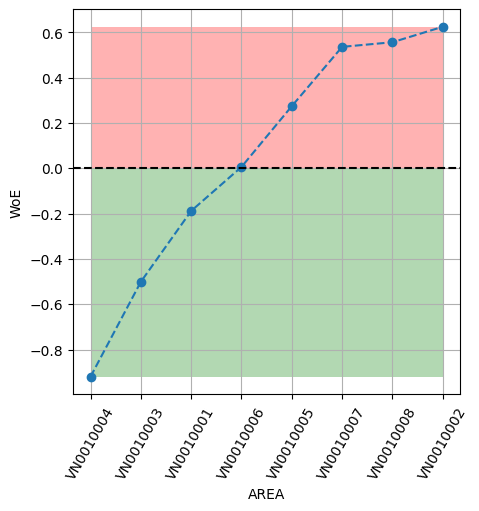

,PROFESSION,n_obs,prop_event,prop_n_obs,n_event,n_non_event,prop_n_event,prop_n_non_event,woe,diff_prop_event,diff_woe,iv
0,"Cong nghiep che bien, san xuat",39728,0.051500,0.043582,2046.5,37682.5,0.154926,0.041945,-1.306597,NaN,NaN,1.184353
1,"Kinh doanh tai san, dich vu tu van",192566,0.022148,0.211245,4265.5,188301.5,0.322912,0.209600,-0.432177,0.029352,0.874420,1.184353
2,"HDong Dang, Doan The va Hiep Hoi",337614,0.018272,0.370363,6169.5,331445.5,0.467050,0.368935,-0.235816,0.003876,0.196361,1.184353
3,Xay dung,1091,0.010082,0.001197,11.5,1080.5,0.000871,0.001203,0.323170,0.008190,0.558987,1.184353
4,"Van tai kho bai, thong tin lien lac",3486,0.008319,0.003824,29.5,3457.5,0.002233,0.003849,0.544249,0.001764,0.221079,1.184353
5,"Thuong nghiep, sua chua",22932,0.006410,0.025156,147.5,22785.5,0.011166,0.025363,0.820390,0.001909,0.276141,1.184353
6,"Qly nha nuoc, an ninh, quoc phong",3193,0.005951,0.003503,19.5,3174.5,0.001476,0.003534,0.872829,0.000460,0.052439,1.184353
7,"Giao duc, dao tao",31754,0.005480,0.034834,174.5,31580.5,0.013210,0.035153,0.978708,0.000471,0.105879,1.184353
8,Thuy san,2958,0.005071,0.003245,15.5,2943.5,0.001173,0.003276,1.026853,0.000409,0.048144,1.184353
9,"Tai chinh, tin dung",2925,0.004444,0.003209,13.5,2912.5,0.001022,0.003242,1.154416,0.000627,0.127563,1.184353


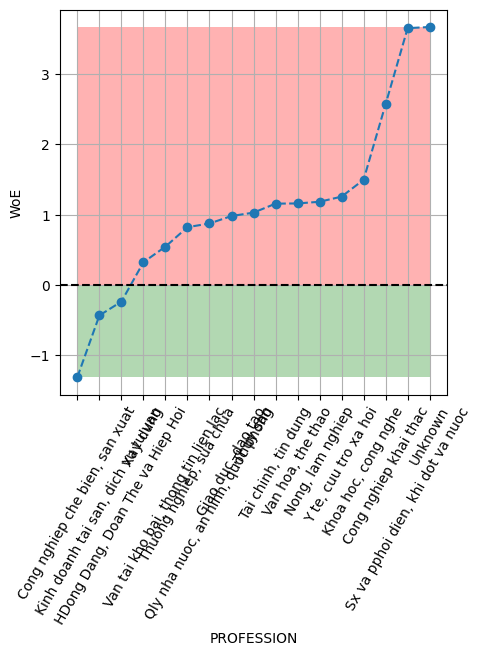

,GEN_GRP,n_obs,prop_event,prop_n_obs,n_event,n_non_event,prop_n_event,prop_n_non_event,woe,diff_prop_event,diff_woe,iv
0,Gen Z,207736,0.021229,0.227886,4410.5,203326.5,0.334040,0.226326,-0.389285,NaN,NaN,0.097087
1,Gen A,218,0.018349,0.000239,4.5,214.5,0.000341,0.000239,-0.355877,0.002880,0.033407,0.097087
2,Gen Y,480121,0.014221,0.526693,6828.5,473293.5,0.517173,0.526831,0.018501,0.004127,0.374378,0.097087
3,Gen X,165647,0.009550,0.181715,1582.5,164065.5,0.119855,0.182624,0.421150,0.004671,0.402649,0.097087
4,Trước Gen X,57855,0.006516,0.063467,377.5,57478.5,0.028591,0.063980,0.805486,0.003034,0.384336,0.097087


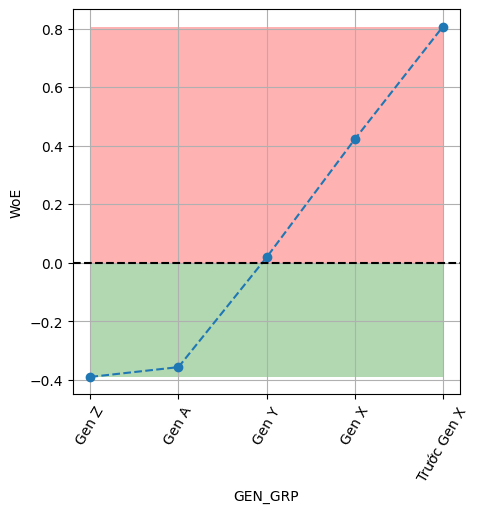

,LIFE_STG,n_obs,prop_event,prop_n_obs,n_event,n_non_event,prop_n_event,prop_n_non_event,woe,diff_prop_event,diff_woe,iv
0,Bắt đầu sự nghiệp,245664,0.018761,0.270583,4609.5,241055.5,0.357353,0.269332,-0.282781,NaN,NaN,0.080868
1,Lập gia đình,307681,0.014730,0.338891,4532.5,303149.5,0.351384,0.338710,-0.036736,0.004032,0.246045,0.080868
2,Thiết lập tài sản,184328,0.013112,0.203025,2417.5,181911.5,0.187418,0.203250,0.081098,0.001617,0.117834,0.080868
3,Bảo vệ tài sản,89425,0.009002,0.098496,805.5,88620.5,0.062447,0.099016,0.460967,0.004111,0.379869,0.080868
4,Cuối sự nghiệp,57223,0.006693,0.063027,383.5,56840.5,0.029731,0.063508,0.758976,0.002309,0.298009,0.080868
5,Nghỉ hưu,23585,0.006360,0.025977,150.5,23435.5,0.011668,0.026185,0.808356,0.000333,0.049379,0.080868


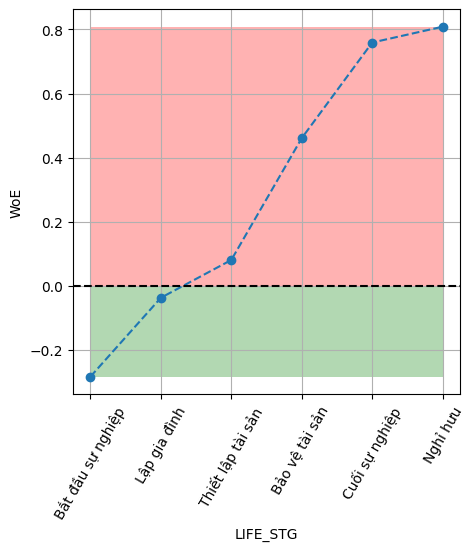

In [22]:
for c in X.select_dtypes(object).columns:
    try:
        tmp_df = woe_cat(X, c, y)
        plot_by_woe(tmp_df)
    except:
        plt.show()
        pass

Guideline for WoE continous variable:

Event and non-event is reactive and no-reactive

WoE > 0: distribution of no-reactive > distribution of reactive
WoE < 0: distribution of no-reactive < distribution of reactive

In [23]:
def woe_continous(df, cat_feat, event_df):
    label = event_df.name
    df = pd.concat([df[cat_feat], event_df], axis=1)
    df = pd.concat([
        df.groupby(cat_feat, as_index=False)[label].count(), 
        df.groupby(cat_feat, as_index=False)[label].mean()
        ], axis=1)
    df = df.iloc[:, [0,1,3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_event']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_event'] = df['prop_event'] * df['n_obs'] + 0.5
    df['n_non_event'] = (1 - df['prop_event']) * df['n_obs'] + 0.5
    df['prop_n_event'] = df['n_event'] / df['n_event'].sum()
    df['prop_n_non_event'] = df['n_non_event'] / df['n_non_event'].sum()
    df['woe'] = np.log(df['prop_n_non_event'] / df['prop_n_event'])
    # df = df.sort_values(['woe'])
    # df = df.reset_index(drop=True)
    df['diff_prop_event'] = df['prop_event'].diff().abs()
    df['diff_woe'] = df['woe'].diff().abs()
    df['iv'] = (df['prop_n_non_event'] - df['prop_n_event']) * df['woe']
    df['iv'] = df['iv'].sum()
    return df

In [24]:
y = mob1['REACTIVATED_CASA']
X = preprocess_data.copy()

In [25]:
valid_cols

['AREA',
 'PROFESSION',
 'GEN_GRP',
 'LIFE_STG',
 'AGE',
 'LOR',
 'CREDIT_SCORE',
 'CASA_BAL_SUM_36M',
 'CASA_BAL_SUM_24M',
 'CASA_TXN_AMT_SUM_12M',
 'CASA_TXN_AMT_SUM_24M',
 'CASA_TXN_AMT_SUM_36M',
 'CASA_TXN_CT_12M',
 'CASA_ACCT_CT_36M',
 'CASA_ACCT_ACTIVE_CT_12M']

## AGE

<Axes: xlabel='AGE', ylabel='Count'>

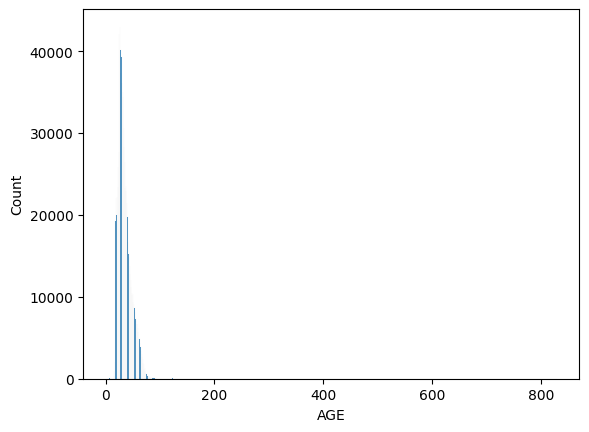

In [26]:
sns.histplot(X['AGE'])

In [27]:
X['AGE'] = X['AGE'].apply(lambda x: 80 if x > 80 else x)

,AGE_factor,n_obs,prop_event,prop_n_obs,n_event,n_non_event,prop_n_event,prop_n_non_event,woe,diff_prop_event,diff_woe,iv
0,"(-0.08, 8.0]",204,0.019608,0.000224,4.5,200.5,0.000341,0.000223,-0.423186,NaN,NaN,0.141319
1,"(8.0, 16.0]",1462,0.125171,0.001604,183.5,1279.5,0.013895,0.001424,-2.277913,0.105563,1.854727,0.141319
2,"(16.0, 24.0]",162622,0.023035,0.178396,3746.5,158876.5,0.283697,0.176848,-0.472618,0.102136,1.805295,0.141319
3,"(24.0, 32.0]",307382,0.013566,0.337198,4170.5,303212.5,0.315803,0.337510,0.066475,0.009469,0.539093,0.141319
4,"(32.0, 40.0]",196322,0.014833,0.215365,2912.5,193410.5,0.220544,0.215288,-0.024120,0.001267,0.090595,0.141319
5,"(40.0, 48.0]",107045,0.011042,0.117428,1182.5,105863.5,0.089543,0.117838,0.274597,0.003791,0.298717,0.141319
6,"(48.0, 56.0]",70011,0.008256,0.076802,578.5,69433.5,0.043806,0.077287,0.567763,0.002786,0.293167,0.141319
7,"(56.0, 64.0]",42944,0.006427,0.047110,276.5,42668.5,0.020937,0.047495,0.819082,0.001829,0.251319,0.141319
8,"(64.0, 72.0]",17720,0.006716,0.019439,119.5,17601.5,0.009049,0.019592,0.772500,0.000289,0.046582,0.141319
9,"(72.0, 80.0]",5865,0.005286,0.006434,31.5,5834.5,0.002385,0.006494,1.001633,0.001430,0.229133,0.141319


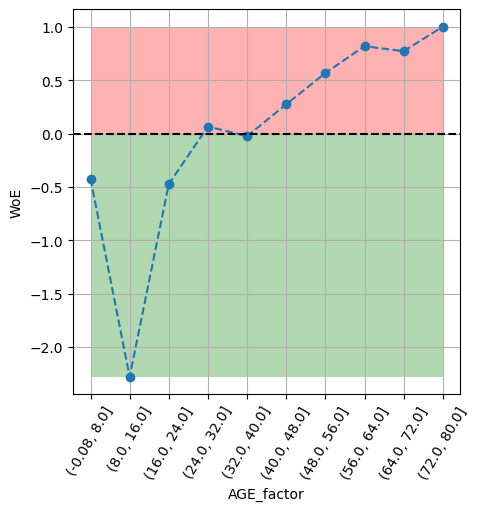

In [28]:
X['AGE_factor'] = pd.cut(X['AGE'],10)
plot_by_woe(woe_continous(X, 'AGE_factor', y))

## LOR

<Axes: xlabel='LOR', ylabel='Count'>

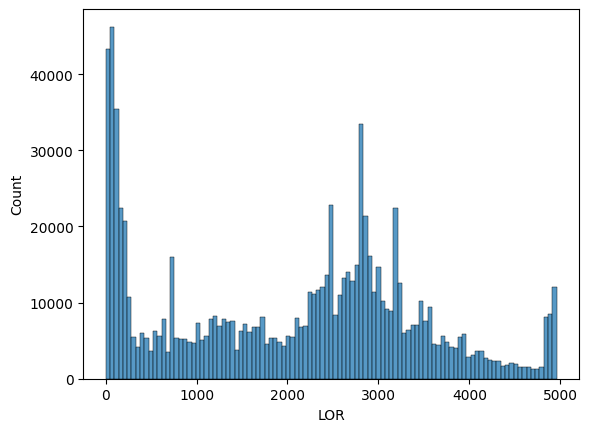

In [29]:
sns.histplot(X['LOR'])

,LOR_factor,n_obs,prop_event,prop_n_obs,n_event,n_non_event,prop_n_event,prop_n_non_event,woe,diff_prop_event,diff_woe,iv
0,"(0.501, 50.9]",44430,0.164731,0.048740,7319.5,37111.5,0.554256,0.041309,-2.596541,NaN,NaN,2.243837
1,"(50.9, 100.8]",49907,0.036067,0.054748,1800.5,48107.5,0.136340,0.053549,-0.934553,0.128664,1.661989,2.243837
2,"(100.8, 150.7]",35413,0.019061,0.038848,675.5,34738.5,0.051151,0.038668,-0.279776,0.017006,0.654777,2.243837
3,"(150.7, 200.6]",23288,0.010606,0.025547,247.5,23041.5,0.018741,0.025648,0.313715,0.008454,0.593491,2.243837
4,"(200.6, 250.5]",17101,0.016607,0.018760,284.5,16817.5,0.021543,0.018720,-0.140484,0.006001,0.454200,2.243837
5,"(250.5, 300.4]",10978,0.007743,0.012043,85.5,10893.5,0.006474,0.012126,0.627479,0.008864,0.767963,2.243837
6,"(300.4, 350.3]",4419,0.011994,0.004848,53.5,4366.5,0.004051,0.004860,0.182109,0.004251,0.445370,2.243837
7,"(350.3, 400.2]",5448,0.009912,0.005976,54.5,5394.5,0.004127,0.006005,0.375008,0.002082,0.192899,2.243837
8,"(400.2, 450.1]",6269,0.011007,0.006877,69.5,6200.5,0.005263,0.006902,0.271132,0.001095,0.103876,2.243837
9,"(450.1, 500.0]",714327,0.003661,0.783614,2615.5,711712.5,0.198054,0.792214,1.386292,0.007346,1.115160,2.243837


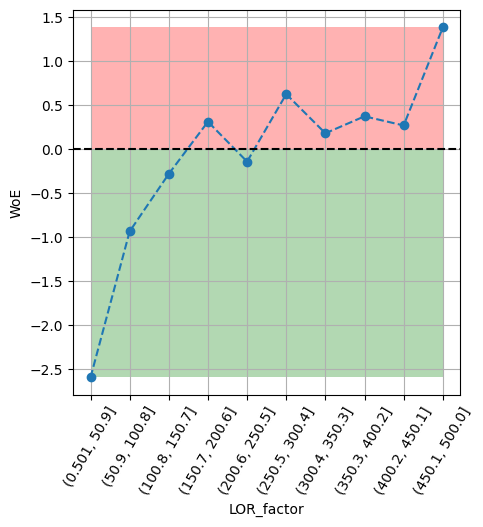

In [30]:
X['LOR_factor'] = X['LOR'].apply(lambda x: x if x < 500 else 500)
X['LOR_factor'] = pd.cut(X['LOR_factor'],10)
plot_by_woe(woe_continous(X, 'LOR_factor', y))

## CREDIT SCORE

<Axes: xlabel='CREDIT_SCORE', ylabel='Count'>

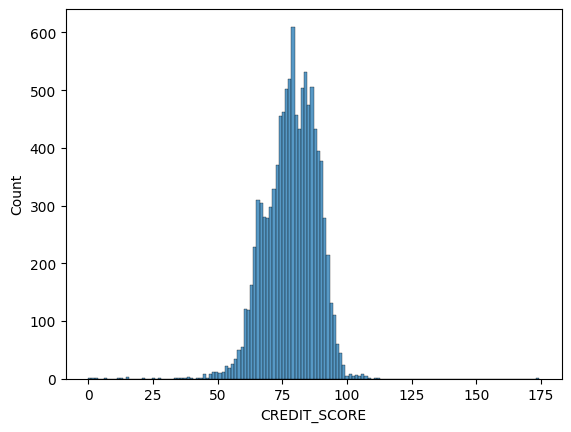

In [31]:
sns.histplot(X['CREDIT_SCORE'])

,CREDIT_SCORE_factor,n_obs,prop_event,prop_n_obs,n_event,n_non_event,prop_n_event,prop_n_non_event,woe,diff_prop_event,diff_woe,iv
0,"(-0.174, 17.428]",9,0.000000,0.000845,0.5,9.5,0.004386,0.000901,-1.583149,NaN,NaN,0.115076
1,"(17.428, 34.856]",4,0.000000,0.000375,0.5,4.5,0.004386,0.000427,-2.330363,0.000000,0.747214,0.115076
2,"(34.856, 52.284]",67,0.000000,0.006288,0.5,67.5,0.004386,0.006399,0.377687,0.000000,2.708050,0.115076
3,"(52.284, 69.712]",1961,0.005099,0.184045,10.5,1951.5,0.092105,0.184994,0.697390,0.005099,0.319704,0.115076
4,"(69.712, 87.14]",6505,0.010915,0.610511,71.5,6434.5,0.627193,0.609963,-0.027856,0.005815,0.725246,0.115076
5,"(87.14, 104.568]",2087,0.013896,0.195870,29.5,2058.5,0.258772,0.195137,-0.282245,0.002981,0.254389,0.115076
6,"(104.568, 121.996]",21,0.000000,0.001971,0.5,21.5,0.004386,0.002038,-0.766388,0.013896,0.484142,0.115076
7,"(121.996, 139.424]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.115076
8,"(139.424, 156.852]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.115076
9,"(156.852, 174.28]",1,0.000000,0.000094,0.5,1.5,0.004386,0.000142,-3.428976,NaN,NaN,0.115076


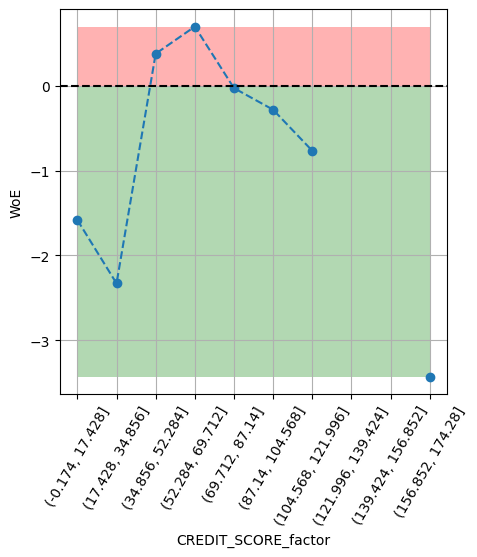

In [64]:
# X['CREDIT_SCORE_factor'] = X['CREDIT_SCORE'].apply(lambda x: 52 if x <= 61 else x)
# X['CREDIT_SCORE_factor'] = pd.cut(X['CREDIT_SCORE_factor'],10)
X['CREDIT_SCORE_factor'] = pd.cut(X['CREDIT_SCORE'],10)
plot_by_woe(woe_continous(X, 'CREDIT_SCORE_factor', y))

In [33]:
#  CASA_TXN_AMT_SUM_12M
#  CASA_TXN_AMT_SUM_24M
#  CASA_TXN_AMT_SUM_36M
#  CASA_TXN_CT_12M
#  CASA_ACCT_CT_36M
#  CASA_ACCT_ACTIVE_CT_12M

In [34]:
X['CASA_BAL_SUM_36M'].describe()

count    4.205920e+05
mean     1.638552e+06
std      1.475670e+08
min      0.000000e+00
25%      2.000000e+04
50%      4.000000e+04
75%      6.200000e+04
max      6.339391e+10
Name: CASA_BAL_SUM_36M, dtype: float64

<Axes: xlabel='CASA_BAL_SUM_36M', ylabel='Count'>

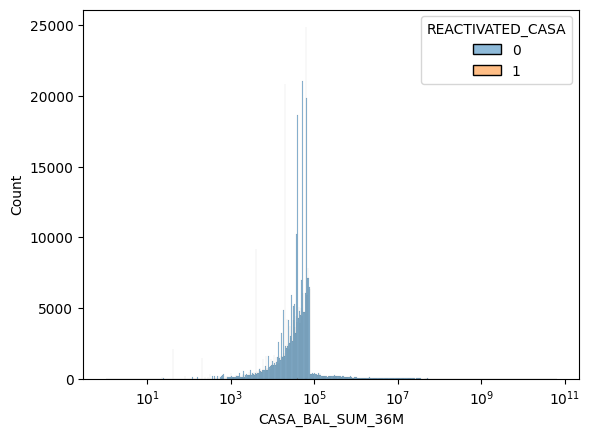

In [81]:
sns.histplot(X, x='CASA_BAL_SUM_36M', log_scale=True, hue=y)

,CASA_BAL_SUM_36M_factor,n_obs,prop_event,prop_n_obs,n_event,n_non_event,prop_n_event,prop_n_non_event,woe,diff_prop_event,diff_woe,iv
0,"(7.983, 8.844]",43282,0.001710,0.102907,74.5,43208.5,0.072541,0.102979,0.350369,NaN,NaN,0.283451
1,"(8.844, 9.687]",36415,0.001977,0.086580,72.5,36343.5,0.070594,0.086618,0.204560,0.000267,0.145809,0.283451
2,"(9.687, 10.531]",114072,0.002104,0.271218,240.5,113832.5,0.234177,0.271298,0.147139,0.000127,0.057421,0.283451
3,"(10.531, 11.375]",198658,0.001998,0.472329,397.5,198261.5,0.387050,0.472518,0.199523,0.000106,0.052384,0.283451
4,"(11.375, 12.218]",8125,0.004431,0.019318,36.5,8089.5,0.035540,0.019280,-0.611614,0.002432,0.811137,0.283451
5,"(12.218, 13.062]",5638,0.006208,0.013405,35.5,5603.5,0.034567,0.013355,-0.951010,0.001777,0.339396,0.283451
6,"(13.062, 13.905]",4092,0.009531,0.009729,39.5,4053.5,0.038462,0.009661,-1.381589,0.003323,0.430579,0.283451
7,"(13.905, 14.749]",2294,0.012206,0.005454,28.5,2266.5,0.027751,0.005402,-1.636536,0.002675,0.254947,0.283451
8,"(14.749, 15.593]",2223,0.010796,0.005285,24.5,2199.5,0.023856,0.005242,-1.515312,0.001410,0.121224,0.283451
9,"(15.593, 16.436]",1962,0.010194,0.004665,20.5,1942.5,0.019961,0.004630,-1.461318,0.000603,0.053994,0.283451


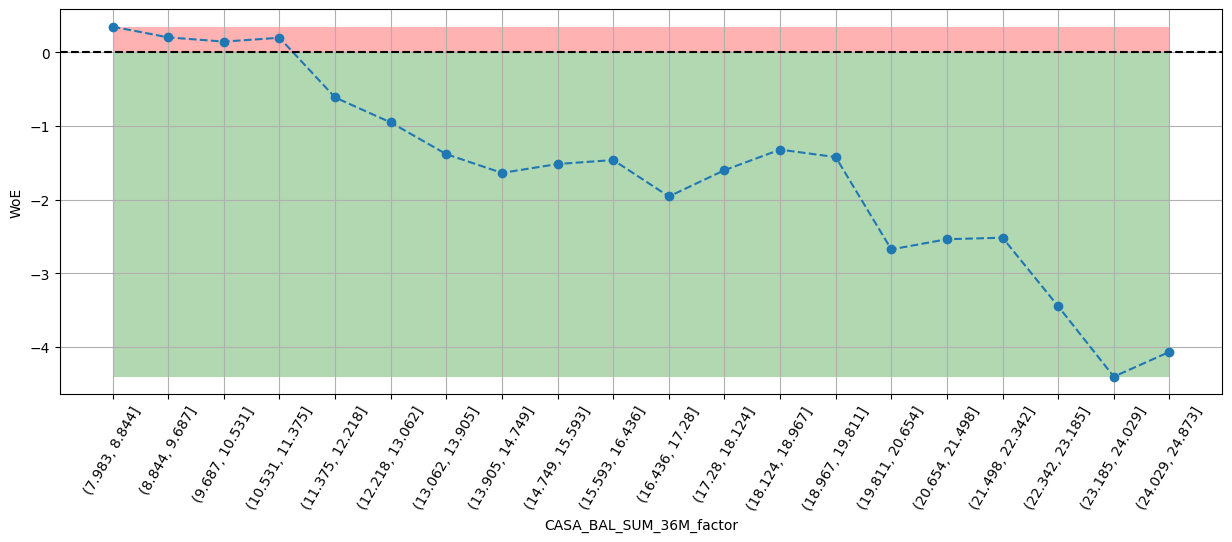

In [92]:
X['CASA_BAL_SUM_36M_factor'] = np.log(X['CASA_BAL_SUM_36M']+1)
X['CASA_BAL_SUM_36M_factor'] = X['CASA_BAL_SUM_36M_factor'].apply(lambda x: 8 if x <=8 else x)
X['CASA_BAL_SUM_36M_factor'] = pd.cut(X['CASA_BAL_SUM_36M_factor'], 20)
# X['CASA_BAL_SUM_36M_factor'] = pd.cut(np.log(X['CASA_BAL_SUM_36M']+1), 20)
plot_by_woe(woe_continous(X, 'CASA_BAL_SUM_36M_factor', y), figsize=(15, 5))

<Axes: xlabel='CASA_ACCT_CT_36M', ylabel='Count'>

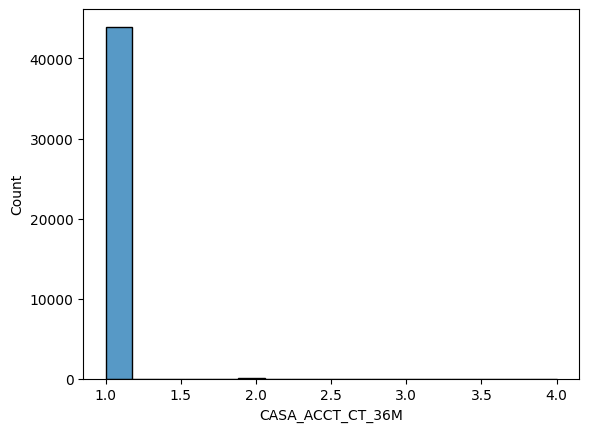

In [37]:
sns.histplot(X['CASA_ACCT_CT_36M'])

,CASA_ACCT_CT_36M_factor,n_obs,prop_event,prop_n_obs,n_event,n_non_event,prop_n_event,prop_n_non_event,woe,diff_prop_event,diff_woe,iv
0,"(0.997, 1.75]",43969,0.007392,0.996487,325.5,43644.5,0.989362,0.996473,0.007162,NaN,NaN,0.043272
1,"(1.75, 2.5]",149,0.000000,0.003377,0.5,149.5,0.001520,0.003413,0.809135,0.007392,0.801973,0.043272
2,"(2.5, 3.25]",4,0.500000,0.000091,2.5,2.5,0.007599,0.000057,-4.891309,0.500000,5.700444,0.043272
3,"(3.25, 4.0]",2,0.000000,0.000045,0.5,2.5,0.001520,0.000057,-3.281871,0.500000,1.609438,0.043272


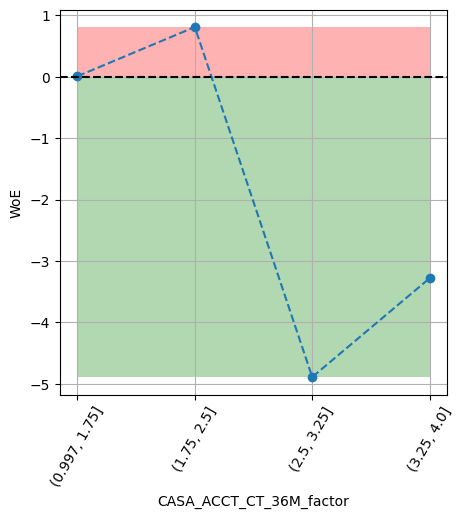

In [76]:
X['CASA_ACCT_CT_36M_factor'] = pd.cut(X['CASA_ACCT_CT_36M'],4)
plot_by_woe(woe_continous(X, 'CASA_ACCT_CT_36M_factor', y))

<Axes: xlabel='CASA_ACCT_ACTIVE_CT_12M', ylabel='Count'>

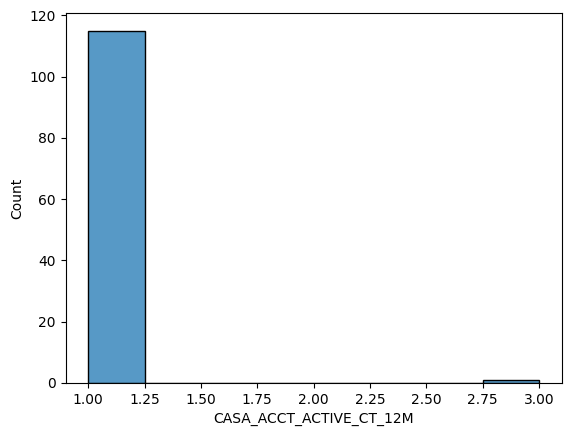

In [39]:
sns.histplot(X['CASA_ACCT_ACTIVE_CT_12M'])

In [40]:
X['CASA_ACCT_ACTIVE_CT_12M'].describe()

count    116.000000
mean       1.017241
std        0.185695
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: CASA_ACCT_ACTIVE_CT_12M, dtype: float64

,CASA_ACCT_ACTIVE_CT_12M_factor,n_obs,prop_event,prop_n_obs,n_event,n_non_event,prop_n_event,prop_n_non_event,woe,diff_prop_event,diff_woe,iv
0,"(0.998, 2.0]",115,0.130435,0.991379,15.5,100.5,0.911765,0.99505,0.087411,NaN,NaN,0.247183
1,"(2.0, 3.0]",1,1.000000,0.008621,1.5,0.5,0.088235,0.00495,-2.880519,0.869565,2.96793,0.247183


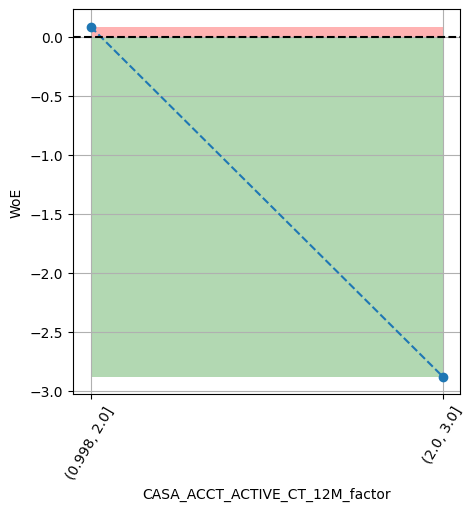

In [90]:

X['CASA_ACCT_ACTIVE_CT_12M_factor'] = pd.cut(X['CASA_ACCT_ACTIVE_CT_12M'],2)
plot_by_woe(woe_continous(X, 'CASA_ACCT_ACTIVE_CT_12M_factor', y))